In [1]:
%pylab inline
import warnings                               # Suppressing annoying Librosa warnings
warnings.filterwarnings('ignore')

import os
from os import walk
import shutil                                 # For shell commands, accessing and manipulating files and directories

from icecream import ic
import math
import numpy as np
import pandas as pd                           # Data analysis
from collections import Counter
from scipy.stats import pearsonr
from sklearn import metrics as sk

import librosa                                # Manipulating sound files
from librosa import display
import IPython.display as ipd
import soundfile
import glob 


import tensorflow as tf                       # Deep Learning
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback, TensorBoard
from imblearn.over_sampling import SMOTE


import matplotlib.pyplot as plt               # Visualizations
from tqdm import tqdm

from sklearn.preprocessing import normalize   # Data Engineering
from sklearn.model_selection import train_test_split


import tkinter as tk
from PIL import ImageTk, Image
import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
model = tf.keras.models.load_model('saved_model/model0.h5')

In [3]:
sample, _ = librosa.load('./data/sounds/0000.WAV')
sample = np.array(sample)
sample = np.reshape(sample, (1, sample.shape[0], 1))

In [4]:
ang_dict = {0: -30,
 1: 0,
 2: 12,
 3: 20,
 4: 23,
 5: 30,
 6: 40,
 7: 60,
 8: 90,
 9: 130,
 10: 180}

In [32]:
def visualize_inference(inference, window=False):

    path = './compass.png'

    #Creates a Tkinter-compatible photo image, which can be used everywhere Tkinter expects an image object.
    img = Image.open(path)
    img = img.resize((300,300), Image.ANTIALIAS)
    img = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
    # Start coordinate, here (0, 0) 
    # represents the top left corner of image 
    start_point = (150, 150) 

    length = 71
    angle = np.radians(inference)

    # End coordinate
    end_point = (int(150 + length * np.sin(angle)), int(150 - length * np.cos(angle)))

    # Green color in BGR 
    color = (255, 0, 0) 

    # Line thickness of 9 px 
    thickness = 5


    img = cv2.arrowedLine(np.asarray(img), start_point, end_point,
                                         color, thickness) 
    # text
    text = f'xxx m to {inference} degrees'

    # font
    font = cv2.FONT_HERSHEY_SIMPLEX

    # org
    org = (35, 290)

    # fontScale
    fontScale = 0.75

    # Red color in BGR
    color = (255, 0, 0)

    # Line thickness of 2 px
    thickness = 2

    # Using cv2.putText() method
    image = cv2.putText(np.asarray(img), text, org, font, fontScale, 
                     color, thickness, cv2.LINE_AA, False)

    if window:
        img = ImageTk.PhotoImage(Image.fromarray(img), master=window)
    else:
        img = ImageTk.PhotoImage(Image.fromarray(img))

    return img

In [28]:
def create_window(angle=False):
    window = tk.Tk()
    window.title("Join")
    window.geometry("300x300")
    window.configure(background='grey')

    img = Image.open('./compass.png')
    img = img.resize((300,300), Image.ANTIALIAS)
    img = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
    img = ImageTk.PhotoImage(Image.fromarray(img))

    
    if angle:
        path = './compass.png'

        #Creates a Tkinter-compatible photo image, which can be used everywhere Tkinter expects an image object.
        img = Image.open(path)
        img = img.resize((300,300), Image.ANTIALIAS)
        img = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
        # Start coordinate, here (0, 0) 
        # represents the top left corner of image 
        start_point = (150, 150) 

        length = 71
        angle = np.radians(angle)

        # End coordinate
        end_point = (int(150 + length * np.sin(angle)), int(150 - length * np.cos(angle)))

        # Green color in BGR 
        color = (255, 0, 0) 

        # Line thickness of 9 px 
        thickness = 5


        img = cv2.arrowedLine(np.asarray(img), start_point, end_point,
                                             color, thickness) 
        img = ImageTk.PhotoImage(Image.fromarray(img))
        

            
    panel = tk.Label(window, image = img)

    #The Pack geometry manager packs widgets in rows or columns.
    panel.pack(side = "bottom", fill = "both", expand = "yes")

    #Start the GUI

    window.lift()
    window.attributes('-topmost',True)
    #window.after_idle(root.attributes,'-topmost',False)

    window.mainloop()
    
    return window



In [33]:
window = tk.Tk()
window.title("Join")
window.geometry("300x300")
window.configure(background='grey')

img = Image.open('./compass.png')
img = img.resize((300,300), Image.ANTIALIAS)
img = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
img = ImageTk.PhotoImage(Image.fromarray(img))

panel = tk.Label(window, image = img)

#The Pack geometry manager packs widgets in rows or columns.
panel.pack(side = "bottom", fill = "both", expand = "yes")

#Start the GUI

window.lift()
window.attributes('-topmost',True)
#window.after_idle(root.attributes,'-topmost',False)

path = './unity'
print('Your folder path is "',path,'"')
before = dict ([(f, None) for f in os.listdir (path)])

def dothis():
    global before
    after = dict ([(f, None) for f in os.listdir (path)])
    added = [f for f in after if not f in before]
    if added:
            print("Added: ", ", ".join (added))
            sample, _ = librosa.load('./unity/'+added[-1])
            sample = np.array(sample)
            sample = np.reshape(sample, (1, sample.shape[0], 1))
            print(f'Angle = {ang_dict[np.argmax(model.predict(sample))]}')
            before = dict ([(f, None) for f in os.listdir (path)])
            change_image(sample)
    window.after(1000,dothis)

def change_image(obs):
    global window
    img = visualize_inference(ang_dict[np.argmax(model.predict(obs))], window=window)
    panel.configure(image=img)
    panel.image = img

    
    
window.after(500, dothis)
window.mainloop()

Your folder path is " ./unity "
Added:  0016.wav
Angle = 40


In [ ]:
path = './unity'
print('Your folder path is "',path,'"')
before = dict ([(f, None) for f in os.listdir (path)])

window = create_window()

while 1:
        after = dict ([(f, None) for f in os.listdir (path)])
        added = [f for f in after if not f in before]
        if added:
                print("Added: ", ", ".join (added))
                sample, _ = librosa.load('./unity/'+added[-1])
                sample = np.array(sample)
                sample = np.reshape(sample, (1, sample.shape[0], 1))
                print(f'Angle = {ang_dict[np.argmax(model.predict(sample))]}')
                before = dict ([(f, None) for f in os.listdir (path)])
                

                #window.panel.configure(image=img)
                #window.panel.image = img
                
                img = visualize_inference(ang_dict[np.argmax(model.predict(sample))], window=window)
                window = create_window(ang_dict[np.argmax(model.predict(sample))])

In [ ]:
from tkinter import *
import tkinter.filedialog
from tkinter.filedialog import askdirectory
from PIL import  Image


class GUI(Frame):
    
    def __init__(self, master=None):
        Frame.__init__(self, master)
        w,h = 300, 300
        master.minsize(width=w, height=h)
        master.maxsize(width=w, height=h)
        self.pack()

        #self.file = Button(self, text='Browse', command=self.choose)
        self.choose = Label(self, text="Choose file").pack()
        self.image = PhotoImage(file='./compass.png')
        self.label = Label(image=self.image)


        #self.file.pack()
        self.label.pack()

    def choose(self, angle):
        #ifile = tkinter.filedialog.askopenfile(parent=self,mode='rb',title='Choose a file')
        path = ifile.name
        self.image2 = PhotoImage(file=path)
        self.label.configure(image=self.image2)
        self.label.image=visualize_inference(angle)
    

In [ ]:
path = './unity'
print('Your folder path is "',path,'"')
before = dict ([(f, None) for f in os.listdir (path)])

window = tk.Tk()
window.title("Join")
window.geometry("300x300")
window.configure(background='grey')

img = Image.open('./compass.png')
img = img.resize((300,300), Image.ANTIALIAS)
img = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
img = ImageTk.PhotoImage(Image.fromarray(img))


panel = tk.Label(window, image = img)

#The Pack geometry manager packs widgets in rows or columns.
panel.pack(side = "bottom", fill = "both", expand = "yes")

#Start the GUI

window.lift()
window.attributes('-topmost',True)
#window.after_idle(root.attributes,'-topmost',False)

window.mainloop()



while 1:
        after = dict ([(f, None) for f in os.listdir (path)])
        added = [f for f in after if not f in before]
        if added:
                print("Added: ", ", ".join (added))
                sample, _ = librosa.load('./unity/'+added[-1])
                sample = np.array(sample)
                sample = np.reshape(sample, (1, sample.shape[0], 1))
                print(f'Angle = {ang_dict[np.argmax(model.predict(sample))]}')
                before = dict ([(f, None) for f in os.listdir (path)])


#                if 'window' in globals(): 
#                    if window.state == 'normal': 
#                        window.destroy()
#                        created = 0
                        


                window = tk.Tk()
                window.title("Join")
                window.geometry("300x300")
                window.configure(background='grey')
                img = visualize_inference(ang_dict[np.argmax(model.predict(sample))])
                
                panel = tk.Label(window, image = img)
                #The Pack geometry manager packs widgets in rows or columns.
                panel.pack(side = "bottom", fill = "both", expand = "yes")

                #Start the GUI

                window.lift()
                window.attributes('-topmost',True)
                #window.after_idle(root.attributes,'-topmost',False)

                window.mainloop()
                
                

                
        else:
             before = after

In [ ]:
import tkinter as tk
from PIL import ImageTk, Image
import cv2

#This creates the main window of an application
window = tk.Tk()
window.title("Join")
window.geometry("300x300")
window.configure(background='grey')

path = './compass.png'

#Creates a Tkinter-compatible photo image, which can be used everywhere Tkinter expects an image object.
img = Image.open(path)
img = img.resize((300,300), Image.ANTIALIAS)
img = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
# Start coordinate, here (0, 0) 
# represents the top left corner of image 
start_point = (150, 150) 

length = 71
angle = np.radians(45)

# End coordinate
end_point = (int(150 + length * np.sin(angle)), int(150 - length * np.cos(angle)))
  
# Green color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 9 px 
thickness = 5
  
# Using cv2.arrowedLine() method 
# Draw a diagonal green arrow line
# with thickness of 9 px 
image = cv2.arrowedLine(np.asarray(img), start_point, end_point,
                                     color, thickness) 


img = ImageTk.PhotoImage(Image.fromarray(image))

#The Label widget is a standard Tkinter widget used to display a text or image on the screen.
panel = tk.Label(window, image = img)

#The Pack geometry manager packs widgets in rows or columns.
panel.pack(side = "bottom", fill = "both", expand = "yes")

#Start the GUI

window.lift()
window.attributes('-topmost',True)
#window.after_idle(root.attributes,'-topmost',False)

window.mainloop()
Tk.update()

In [ ]:
for widget in window.winfo_children():
    widget.destroy()
window.destroy()

In [ ]:
plt.imshow(Image.fromarray(resized))

In [ ]:
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)


#resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
label = tk.Label(image=Image.fromarray(resized))
label.image = resized # keep a reference! label.pack()


In [ ]:
angle = -30

np.radians(angle)

# Train Models

In [129]:
folder = './lasthope/'
files = next(os.walk(folder))
mode = 'mono'

In [130]:
for i in range(len(files[2])):

    if ' (1)' in files[2][i]: ic(files[2][i])
    re.sub(' (1)', '_', files[2][i])


In [131]:
x = []
y= []
d = []

for i in range(len(files[2])):
    x.append(files[2][i])
    
    y.append(int(re.split('\.|_', files[2][i])[1]))
    d.append(int(re.split('\.|_', files[2][i])[3]))

In [132]:
y

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 101,
 101,
 101,
 101,
 102,
 102,
 103,
 103,
 103,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 104,
 105,
 105,
 105,
 105,
 105,
 106,
 106,
 106,
 106,
 106,
 107,
 107,
 107,
 108,
 108,
 108,
 108,
 108,
 108,
 108,
 108,
 108,
 109,
 109,
 109,
 109,
 109,
 10,
 10,
 10,
 10,
 10,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 111,
 111,
 111,
 111,
 111,
 112,
 112,
 112,
 112,
 112,
 112,
 112,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 114,
 114,
 114,
 114,
 115,
 115,
 115,
 115,
 115,
 115,
 116,
 116,
 116,
 116,
 116,
 117,
 117,
 117,
 117,
 117,
 117,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 119,
 119,
 119,
 119,
 11,
 11,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 124,
 124,
 124,
 125,
 125,
 125,
 125,
 125,
 125,
 126,
 126,

In [133]:
#bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 0]

y_binned = [round(yy / 20)*20 % 360 for yy in y]

y_binned

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 0,
 0,
 0,
 0,
 0,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 20,
 20,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120

In [134]:
#bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 150]

d_binned = [round(dd/10)*10 for dd in d]

d_binned

[110,
 140,
 150,
 150,
 20,
 200,
 240,
 30,
 60,
 60,
 10,
 110,
 270,
 100,
 120,
 30,
 120,
 120,
 130,
 130,
 140,
 20,
 170,
 220,
 230,
 290,
 60,
 270,
 270,
 300,
 80,
 80,
 100,
 10,
 190,
 210,
 280,
 160,
 230,
 280,
 160,
 160,
 180,
 180,
 190,
 50,
 70,
 10,
 100,
 210,
 230,
 280,
 90,
 90,
 130,
 170,
 250,
 300,
 80,
 100,
 110,
 170,
 200,
 230,
 250,
 270,
 110,
 160,
 240,
 270,
 290,
 120,
 180,
 180,
 210,
 300,
 40,
 10,
 120,
 130,
 180,
 200,
 220,
 260,
 280,
 290,
 60,
 100,
 160,
 200,
 80,
 120,
 130,
 130,
 20,
 230,
 240,
 140,
 190,
 230,
 290,
 70,
 120,
 20,
 200,
 220,
 240,
 280,
 120,
 150,
 160,
 20,
 190,
 60,
 70,
 80,
 20,
 220,
 300,
 90,
 20,
 40,
 150,
 20,
 20,
 260,
 30,
 280,
 10,
 70,
 80,
 110,
 120,
 10,
 180,
 250,
 260,
 40,
 70,
 80,
 100,
 120,
 150,
 160,
 160,
 20,
 20,
 270,
 290,
 50,
 10,
 120,
 160,
 20,
 250,
 270,
 60,
 140,
 230,
 20,
 170,
 250,
 260,
 30,
 40,
 100,
 20,
 170,
 170,
 230,
 250,
 260,
 100,
 100,
 100,
 1

In [135]:
x_obs = []
min_time = 18000
for k in range(len(x)):
    if mode != 'mono':
        obs, sr = librosa.load(folder+x[k], mono=False)#, mono=False
        x_obs.append(obs[:, 1000:16000])# :,
    else:
        obs, sr = librosa.load(folder+x[k])#, mono=False
        x_obs.append(obs[1000:16000])# :,

x_obs = np.array(x_obs)
x_obs.shape

(2398, 15000)

In [136]:
z_vals, z_counts = np.unique(y_binned, return_counts=True)                   # There is a serious imbalance in the class samplesnp.unique(y[:, 0], return_counts=True)                   # There is a serious imbalance in the class samples
np.unique(y_binned, return_counts=True)

(array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340]),
 array([129, 132, 143, 114, 146, 101, 136, 128, 145, 128, 142, 124, 142,
        139, 167, 121, 137, 124], dtype=int64))

In [137]:
if mode != 'mono': x = np.reshape(x_obs, [-1, 15000, 2]) #2
else: x = np.reshape(x_obs, [-1, 15000, 1]) #2
y = np.array(y_binned)
d = np.array(d_binned)
z = np.copy(y)
y = np.reshape(y, [-1, 1])
d = np.reshape(d, [-1, 1])

In [138]:
x0 = np.copy(x)
y0 = np.copy(y)
d0 = np.copy(d)

In [70]:
z_vals, z_counts = np.unique(y_binned, return_counts=True) 
max_ct = max(z_counts)
x0 = np.copy(x)
y0 = np.copy(y)
d0 = np.copy(d)
for val, ct in zip(z_vals, z_counts):
    
    mult = max_ct // ct - 1
    mult += (max_ct - ct*(1+mult))/ct
    rem = mult % 1
    mult = int(mult // 1)

    new_entries = np.tile(x[np.where(z==val)],(mult,1))
    new_targets = np.tile(y[np.where(z==val)],(mult,1))
    new_ds      = np.tile(d[np.where(z==val)],(mult,1))
 

    if mult > 0:
        x0 = np.append(x0, new_entries, axis = 0)
        y0 = np.append(y0, new_targets, axis = 0)
        d0 = np.append(d0, new_ds, axis = 0)
    

    new_entries = x[np.where(z==val)][0:int(rem*ct)]
    new_targets = y[np.where(z==val)][0:int(rem*ct)]
    new_ds      = d[np.where(z==val)][0:int(rem*ct)]
    
    x0 = np.append(x0, new_entries, axis = 0)
    y0 = np.append(y0, new_targets, axis = 0)
    d0 = np.append(d0, new_ds, axis = 0)

In [139]:
np.unique(y0, return_counts=True)

(array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340]),
 array([129, 132, 143, 114, 146, 101, 136, 128, 145, 128, 142, 124, 142,
        139, 167, 121, 137, 124], dtype=int64))

In [140]:
z_vals, z_counts = np.unique(d0, return_counts=True)                   # There is a serious imbalance in the class samplesnp.unique(y[:, 0], return_counts=True)                   # There is a serious imbalance in the class samples
np.unique(y_binned, return_counts=True)

(array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340]),
 array([129, 132, 143, 114, 146, 101, 136, 128, 145, 128, 142, 124, 142,
        139, 167, 121, 137, 124], dtype=int64))

In [141]:
if mode != 'mono': x = np.reshape(x0, [-1, 15000, 2]) #2
else: x = np.reshape(x0, [-1, 15000, 1]) #2
y = y0
d = d0

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [143]:
dx_train, dx_test, d_train, d_test = train_test_split(x, d, test_size=0.10, random_state=42)

In [144]:
def hot_encoder(y_train, y_test):
    y_test = np.reshape(y_test, (y_test.shape[0], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], 1))
    
    vals = np.unique(y_train.astype(int))
    keys = np.array(range(len(vals)))
    valdict = {val:key for key, val in zip(keys, vals)}
    ic(valdict)
    y_test = np.array([valdict[v[0]] for v in y_test.astype(int)])
    y_train = np.array([valdict[v[0]] for v in y_train.astype(int)])
    
    n_classes = len(np.unique(y_train))
    y_train = np.array(y_train.astype(int))
    y_train = np.eye(n_classes)[y_train]                  # One-hot encoding of target variable
    y_test = np.array(y_test.astype(int))
    y_test = np.eye(n_classes)[y_test]
    return y_train, y_test

In [145]:
y_train, y_test = hot_encoder(y_train, y_test)
d_train, d_test = hot_encoder(d_train, d_test)

ic| valdict: {0: 0,
              20: 1,
              40: 2,
              60: 3,
              80: 4,
              100: 5,
              120: 6,
              140: 7,
              160: 8,
              180: 9,
              200: 10,
              220: 11,
              240: 12,
              260: 13,
              280: 14,
              300: 15,
              320: 16,
              340: 17}
ic| valdict: {10: 0,
              20: 1,
              30: 2,
              40: 3,
              50: 4,
              60: 5,
              70: 6,
              80: 7,
              90: 8,
              100: 9,
              110: 10,
              120: 11,
              130: 12,
              140: 13,
              150: 14,
              160: 15,
              170: 16,
              180: 17,
              190: 18,
              200: 19,
              210: 20,
              220: 21,
              230: 22,
              240: 23,
              250: 24,
              260: 25,
              270: 26,


In [146]:
tf.compat.v1.reset_default_graph()
tf.random.set_seed(23)

In [147]:
ic(x_train.shape, y_train.shape)

ic| x_train.shape: (2158, 15000, 1), y_train.shape: (2158, 18)


((2158, 15000, 1), (2158, 18))

In [148]:
ic(x_test.shape, y_test.shape)

ic| x_test.shape: (240, 15000, 1), y_test.shape: (240, 18)


((240, 15000, 1), (240, 18))

In [149]:
ic(x_train.shape, d_train.shape)

ic| x_train.shape: (2158, 15000, 1), d_train.shape: (2158, 30)


((2158, 15000, 1), (2158, 30))

In [150]:
ic(x_test.shape, d_test.shape)

ic| x_test.shape: (240, 15000, 1), d_test.shape: (240, 30)


((240, 15000, 1), (240, 30))

In [151]:
if mode != 'mono': feat = 2
else: feat = 1

In [152]:
def modelizer(x_train, x_test, y_train, y_test):
    
    verbose, epochs, batch_size = 1, 800, 32
    n_timesteps, n_outputs = 15000, y_test.shape[1]
    n_features = feat
    kr =0
    activation = 'relu'
    initializer = tf.keras.initializers.HeUniform()


    model = keras.Sequential()

    # Network Backbone
    model.add(Conv1D(filters=32, kernel_size=128, strides=8, activation=activation, kernel_initializer=initializer, input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=32, kernel_size=16, strides=4, activation=activation, kernel_initializer=initializer))
    model.add(Conv1D(filters=64, kernel_size=8, strides=2, activation=activation, kernel_initializer=initializer))
    model.add(Conv1D(filters=64, kernel_size=3, activation=activation, kernel_initializer=initializer))
    model.add(Conv1D(filters=128, kernel_size=4, strides=2, activation=activation, kernel_initializer=initializer))
    model.add(Conv1D(filters=256, kernel_size=3, activation=activation, kernel_initializer=initializer))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=256, kernel_size=8, strides=4, activation=activation, kernel_initializer=initializer))

    # Network Head
    model.add(Flatten())
    model.add(Dense(128, activation=activation,kernel_initializer=initializer))
    model.add(Dropout(0.33))
    model.add(Dense(64, activation=activation,kernel_initializer=initializer))
    model.add(Dropout(0.33))
    model.add(Dense(n_outputs, activation='softmax'))
    #model.add(Conv1D(filters=128, kernel_size=1, activation=activation))
    #model.add(Conv1D(filters=64, kernel_size=1, activation=activation))
    #model.add(Conv1D(filters=n_outputs, kernel_size=1))
    #model.add(layers.GlobalMaxPooling1D())
    #model.add(layers.Softmax())


    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


    checkpoint_filepath = 'weights.{epoch:02d}-{loss:.2f}.hdf5'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)

    initial_learning_rate = 0.01

    def lr_step_decay(epoch, lr):
        drop_rate = 0.5
        epochs_drop = 10.0
        return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

    callbacks = [model_checkpoint_callback] #callbacks = callbacks,
    model.summary()
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,  validation_data = (x_test, y_test), verbose=verbose)
    return model

In [153]:
model_a = modelizer(x_train, x_test, y_train, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1860, 32)          4128      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 462, 32)           16416     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 228, 64)           16448     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 226, 64)           12352     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 112, 128)          32896     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 110, 256)          98560     
_________________________________________________________________
dropout (Dropout)            (None, 110, 256)          0

68/68 [==============================] - 1s 11ms/step - loss: 1.2475 - accuracy: 0.4708 - val_loss: 1.3545 - val_accuracy: 0.4750
Epoch 43/800
68/68 [==============================] - 1s 11ms/step - loss: 1.2354 - accuracy: 0.4634 - val_loss: 1.3976 - val_accuracy: 0.4833
Epoch 44/800
68/68 [==============================] - 1s 11ms/step - loss: 1.2161 - accuracy: 0.4722 - val_loss: 1.4795 - val_accuracy: 0.4083
Epoch 45/800
68/68 [==============================] - 1s 11ms/step - loss: 1.1905 - accuracy: 0.4917 - val_loss: 1.3064 - val_accuracy: 0.4667
Epoch 46/800
68/68 [==============================] - 1s 11ms/step - loss: 1.1444 - accuracy: 0.5042 - val_loss: 1.4159 - val_accuracy: 0.4750
Epoch 47/800
68/68 [==============================] - 1s 11ms/step - loss: 1.1604 - accuracy: 0.4889 - val_loss: 1.3074 - val_accuracy: 0.5542
Epoch 48/800
68/68 [==============================] - 1s 11ms/step - loss: 1.0969 - accuracy: 0.5259 - val_loss: 1.3471 - val_accuracy: 0.4375
Epoch 49/800

68/68 [==============================] - 1s 10ms/step - loss: 0.4610 - accuracy: 0.8095 - val_loss: 1.5339 - val_accuracy: 0.6333
Epoch 100/800
68/68 [==============================] - 1s 11ms/step - loss: 0.4631 - accuracy: 0.8123 - val_loss: 1.4690 - val_accuracy: 0.6750
Epoch 101/800
68/68 [==============================] - 1s 11ms/step - loss: 0.4647 - accuracy: 0.8100 - val_loss: 1.6542 - val_accuracy: 0.6167
Epoch 102/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4512 - accuracy: 0.8146 - val_loss: 1.4279 - val_accuracy: 0.6792
Epoch 103/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4717 - accuracy: 0.8123 - val_loss: 1.3171 - val_accuracy: 0.7000
Epoch 104/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4330 - accuracy: 0.8234 - val_loss: 1.3921 - val_accuracy: 0.7042
Epoch 105/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4265 - accuracy: 0.8276 - val_loss: 1.5109 - val_accuracy: 0.6708
Epoch 

Epoch 156/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2506 - accuracy: 0.9027 - val_loss: 1.7106 - val_accuracy: 0.7542
Epoch 157/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2216 - accuracy: 0.9222 - val_loss: 1.9024 - val_accuracy: 0.7167
Epoch 158/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2535 - accuracy: 0.8994 - val_loss: 1.8283 - val_accuracy: 0.6958
Epoch 159/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2458 - accuracy: 0.9078 - val_loss: 1.9455 - val_accuracy: 0.6792
Epoch 160/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2483 - accuracy: 0.9106 - val_loss: 1.7379 - val_accuracy: 0.7083
Epoch 161/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2452 - accuracy: 0.9027 - val_loss: 1.7499 - val_accuracy: 0.7125
Epoch 162/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2300 - accuracy: 0.9189 - val_loss: 1.8884 - val_accuracy:

Epoch 213/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1679 - accuracy: 0.9384 - val_loss: 1.9861 - val_accuracy: 0.7167
Epoch 214/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1672 - accuracy: 0.9435 - val_loss: 2.0520 - val_accuracy: 0.7208
Epoch 215/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1726 - accuracy: 0.9361 - val_loss: 1.9401 - val_accuracy: 0.7542
Epoch 216/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1692 - accuracy: 0.9458 - val_loss: 2.1085 - val_accuracy: 0.7333
Epoch 217/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1661 - accuracy: 0.9453 - val_loss: 2.0435 - val_accuracy: 0.7292
Epoch 218/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1914 - accuracy: 0.9328 - val_loss: 2.0523 - val_accuracy: 0.7167
Epoch 219/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1842 - accuracy: 0.9356 - val_loss: 2.0461 - val_accuracy:

Epoch 270/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1188 - accuracy: 0.9555 - val_loss: 1.9362 - val_accuracy: 0.7833
Epoch 271/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1394 - accuracy: 0.9527 - val_loss: 1.7965 - val_accuracy: 0.7750
Epoch 272/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1307 - accuracy: 0.9583 - val_loss: 1.9425 - val_accuracy: 0.7792
Epoch 273/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1107 - accuracy: 0.9615 - val_loss: 1.9856 - val_accuracy: 0.7750
Epoch 274/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1341 - accuracy: 0.9504 - val_loss: 1.9504 - val_accuracy: 0.7375
Epoch 275/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1293 - accuracy: 0.9564 - val_loss: 2.0493 - val_accuracy: 0.7583
Epoch 276/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1350 - accuracy: 0.9523 - val_loss: 1.9769 - val_accuracy:

Epoch 327/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1207 - accuracy: 0.9588 - val_loss: 2.1120 - val_accuracy: 0.7667
Epoch 328/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1079 - accuracy: 0.9629 - val_loss: 2.2203 - val_accuracy: 0.7292
Epoch 329/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0952 - accuracy: 0.9629 - val_loss: 2.3024 - val_accuracy: 0.7292
Epoch 330/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1297 - accuracy: 0.9551 - val_loss: 1.9348 - val_accuracy: 0.7375
Epoch 331/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0823 - accuracy: 0.9694 - val_loss: 2.0839 - val_accuracy: 0.7542
Epoch 332/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1138 - accuracy: 0.9643 - val_loss: 2.1093 - val_accuracy: 0.7250
Epoch 333/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0973 - accuracy: 0.9662 - val_loss: 2.2777 - val_accuracy:

Epoch 384/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1154 - accuracy: 0.9676 - val_loss: 2.1074 - val_accuracy: 0.7708
Epoch 385/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0879 - accuracy: 0.9671 - val_loss: 2.3295 - val_accuracy: 0.7292
Epoch 386/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1187 - accuracy: 0.9574 - val_loss: 2.1890 - val_accuracy: 0.7625
Epoch 387/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0702 - accuracy: 0.9782 - val_loss: 2.2865 - val_accuracy: 0.7667
Epoch 388/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0999 - accuracy: 0.9690 - val_loss: 2.4381 - val_accuracy: 0.7375
Epoch 389/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1093 - accuracy: 0.9676 - val_loss: 2.2763 - val_accuracy: 0.7292
Epoch 390/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0793 - accuracy: 0.9722 - val_loss: 2.2285 - val_accuracy:

Epoch 441/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1144 - accuracy: 0.9611 - val_loss: 2.3524 - val_accuracy: 0.7292
Epoch 442/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1127 - accuracy: 0.9657 - val_loss: 1.9017 - val_accuracy: 0.7542
Epoch 443/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0953 - accuracy: 0.9680 - val_loss: 2.1662 - val_accuracy: 0.7333
Epoch 444/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0791 - accuracy: 0.9754 - val_loss: 2.0161 - val_accuracy: 0.7833
Epoch 445/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0962 - accuracy: 0.9690 - val_loss: 2.2338 - val_accuracy: 0.7667
Epoch 446/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1005 - accuracy: 0.9731 - val_loss: 2.0716 - val_accuracy: 0.7750
Epoch 447/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0861 - accuracy: 0.9768 - val_loss: 2.2433 - val_accuracy:

Epoch 498/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0650 - accuracy: 0.9787 - val_loss: 2.3843 - val_accuracy: 0.7833
Epoch 499/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0653 - accuracy: 0.9801 - val_loss: 2.4448 - val_accuracy: 0.7500
Epoch 500/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0583 - accuracy: 0.9856 - val_loss: 2.6326 - val_accuracy: 0.7458
Epoch 501/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0612 - accuracy: 0.9796 - val_loss: 2.4565 - val_accuracy: 0.7417
Epoch 502/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0695 - accuracy: 0.9759 - val_loss: 2.2697 - val_accuracy: 0.7667
Epoch 503/800
68/68 [==============================] - 1s 11ms/step - loss: 0.0566 - accuracy: 0.9796 - val_loss: 2.3382 - val_accuracy: 0.7750
Epoch 504/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0658 - accuracy: 0.9782 - val_loss: 2.2636 - val_accuracy:

Epoch 555/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0819 - accuracy: 0.9699 - val_loss: 2.7475 - val_accuracy: 0.7250
Epoch 556/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1325 - accuracy: 0.9703 - val_loss: 2.1641 - val_accuracy: 0.7667
Epoch 557/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0634 - accuracy: 0.9778 - val_loss: 2.4310 - val_accuracy: 0.7458
Epoch 558/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0463 - accuracy: 0.9842 - val_loss: 2.4717 - val_accuracy: 0.7500
Epoch 559/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0724 - accuracy: 0.9815 - val_loss: 2.4706 - val_accuracy: 0.7333
Epoch 560/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0562 - accuracy: 0.9815 - val_loss: 2.4597 - val_accuracy: 0.7500
Epoch 561/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 2.5355 - val_accuracy:

Epoch 612/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0661 - accuracy: 0.9824 - val_loss: 2.4763 - val_accuracy: 0.7583
Epoch 613/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 2.5661 - val_accuracy: 0.7708
Epoch 614/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0640 - accuracy: 0.9787 - val_loss: 2.4432 - val_accuracy: 0.7625
Epoch 615/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0446 - accuracy: 0.9903 - val_loss: 2.3439 - val_accuracy: 0.7917
Epoch 616/800
68/68 [==============================] - 1s 11ms/step - loss: 0.0393 - accuracy: 0.9893 - val_loss: 2.5861 - val_accuracy: 0.7750
Epoch 617/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0891 - accuracy: 0.9722 - val_loss: 2.1825 - val_accuracy: 0.7917
Epoch 618/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0549 - accuracy: 0.9889 - val_loss: 2.1924 - val_accuracy:

Epoch 669/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0409 - accuracy: 0.9847 - val_loss: 2.4309 - val_accuracy: 0.7833
Epoch 670/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0375 - accuracy: 0.9875 - val_loss: 2.4222 - val_accuracy: 0.7833
Epoch 671/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0418 - accuracy: 0.9861 - val_loss: 2.3476 - val_accuracy: 0.7917
Epoch 672/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0365 - accuracy: 0.9870 - val_loss: 2.4861 - val_accuracy: 0.7833
Epoch 673/800
68/68 [==============================] - 1s 11ms/step - loss: 0.0497 - accuracy: 0.9833 - val_loss: 2.6359 - val_accuracy: 0.7708
Epoch 674/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 2.5363 - val_accuracy: 0.7875
Epoch 675/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 2.5306 - val_accuracy:

Epoch 726/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 2.6127 - val_accuracy: 0.7833
Epoch 727/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0517 - accuracy: 0.9870 - val_loss: 2.4828 - val_accuracy: 0.7875
Epoch 728/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0501 - accuracy: 0.9861 - val_loss: 2.4806 - val_accuracy: 0.7833
Epoch 729/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0290 - accuracy: 0.9898 - val_loss: 2.6039 - val_accuracy: 0.7833
Epoch 730/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0250 - accuracy: 0.9930 - val_loss: 2.6336 - val_accuracy: 0.7833
Epoch 731/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0391 - accuracy: 0.9852 - val_loss: 2.7115 - val_accuracy: 0.7792
Epoch 732/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0506 - accuracy: 0.9870 - val_loss: 2.5110 - val_accuracy:

Epoch 783/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 2.2999 - val_accuracy: 0.7792
Epoch 784/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0482 - accuracy: 0.9884 - val_loss: 2.2922 - val_accuracy: 0.7667
Epoch 785/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0511 - accuracy: 0.9829 - val_loss: 2.4080 - val_accuracy: 0.7875
Epoch 786/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0462 - accuracy: 0.9870 - val_loss: 2.4219 - val_accuracy: 0.7667
Epoch 787/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 2.4317 - val_accuracy: 0.7625
Epoch 788/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0418 - accuracy: 0.9833 - val_loss: 2.3716 - val_accuracy: 0.7708
Epoch 789/800
68/68 [==============================] - 1s 10ms/step - loss: 0.0344 - accuracy: 0.9884 - val_loss: 2.7423 - val_accuracy:

In [154]:
model_d = modelizer(x_train, x_test, d_train, d_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 1860, 32)          4128      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 462, 32)           16416     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 228, 64)           16448     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 226, 64)           12352     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 112, 128)          32896     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 110, 256)          98560     
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 256)         

Epoch 43/800
68/68 [==============================] - 1s 10ms/step - loss: 1.8541 - accuracy: 0.2887 - val_loss: 1.7454 - val_accuracy: 0.3042
Epoch 44/800
68/68 [==============================] - 1s 10ms/step - loss: 1.8476 - accuracy: 0.2901 - val_loss: 1.9548 - val_accuracy: 0.2083
Epoch 45/800
68/68 [==============================] - 1s 10ms/step - loss: 1.8024 - accuracy: 0.2915 - val_loss: 1.7162 - val_accuracy: 0.3292
Epoch 46/800
68/68 [==============================] - 1s 10ms/step - loss: 1.7895 - accuracy: 0.3017 - val_loss: 1.9509 - val_accuracy: 0.2000
Epoch 47/800
68/68 [==============================] - 1s 10ms/step - loss: 1.7865 - accuracy: 0.2984 - val_loss: 1.5754 - val_accuracy: 0.3500
Epoch 48/800
68/68 [==============================] - 1s 10ms/step - loss: 1.7596 - accuracy: 0.3100 - val_loss: 1.6626 - val_accuracy: 0.3000
Epoch 49/800
68/68 [==============================] - 1s 10ms/step - loss: 1.7271 - accuracy: 0.3230 - val_loss: 1.5817 - val_accuracy: 0.3625

68/68 [==============================] - 1s 11ms/step - loss: 1.1644 - accuracy: 0.5153 - val_loss: 1.2127 - val_accuracy: 0.5000
Epoch 101/800
68/68 [==============================] - 1s 11ms/step - loss: 1.2184 - accuracy: 0.4963 - val_loss: 1.2490 - val_accuracy: 0.4458
Epoch 102/800
68/68 [==============================] - 1s 11ms/step - loss: 1.1820 - accuracy: 0.4935 - val_loss: 1.2855 - val_accuracy: 0.4500
Epoch 103/800
68/68 [==============================] - 1s 11ms/step - loss: 1.1730 - accuracy: 0.4972 - val_loss: 1.3154 - val_accuracy: 0.4500
Epoch 104/800
68/68 [==============================] - 1s 11ms/step - loss: 1.1466 - accuracy: 0.5185 - val_loss: 1.2870 - val_accuracy: 0.4792
Epoch 105/800
68/68 [==============================] - 1s 11ms/step - loss: 1.1346 - accuracy: 0.5195 - val_loss: 1.3420 - val_accuracy: 0.4583
Epoch 106/800
68/68 [==============================] - 1s 11ms/step - loss: 1.1171 - accuracy: 0.5241 - val_loss: 1.3101 - val_accuracy: 0.3750
Epoch 

Epoch 157/800
68/68 [==============================] - 1s 10ms/step - loss: 0.8755 - accuracy: 0.6242 - val_loss: 1.2969 - val_accuracy: 0.4958
Epoch 158/800
68/68 [==============================] - 1s 10ms/step - loss: 0.8481 - accuracy: 0.6413 - val_loss: 1.2807 - val_accuracy: 0.5833
Epoch 159/800
68/68 [==============================] - 1s 10ms/step - loss: 0.8322 - accuracy: 0.6497 - val_loss: 1.3815 - val_accuracy: 0.5875
Epoch 160/800
68/68 [==============================] - 1s 10ms/step - loss: 0.8168 - accuracy: 0.6548 - val_loss: 1.0947 - val_accuracy: 0.6000
Epoch 161/800
68/68 [==============================] - 1s 10ms/step - loss: 0.7638 - accuracy: 0.6705 - val_loss: 1.3172 - val_accuracy: 0.5625
Epoch 162/800
68/68 [==============================] - 1s 10ms/step - loss: 0.7894 - accuracy: 0.6719 - val_loss: 1.1246 - val_accuracy: 0.5583
Epoch 163/800
68/68 [==============================] - 1s 11ms/step - loss: 0.7787 - accuracy: 0.6789 - val_loss: 1.2041 - val_accuracy:

Epoch 214/800
68/68 [==============================] - 1s 10ms/step - loss: 0.5977 - accuracy: 0.7488 - val_loss: 1.4502 - val_accuracy: 0.6375
Epoch 215/800
68/68 [==============================] - 1s 10ms/step - loss: 0.5795 - accuracy: 0.7563 - val_loss: 1.3542 - val_accuracy: 0.6375
Epoch 216/800
68/68 [==============================] - 1s 10ms/step - loss: 0.5893 - accuracy: 0.7498 - val_loss: 1.5206 - val_accuracy: 0.6417
Epoch 217/800
68/68 [==============================] - 1s 10ms/step - loss: 0.6027 - accuracy: 0.7516 - val_loss: 1.8196 - val_accuracy: 0.6083
Epoch 218/800
68/68 [==============================] - 1s 10ms/step - loss: 0.6089 - accuracy: 0.7419 - val_loss: 1.4362 - val_accuracy: 0.6583
Epoch 219/800
68/68 [==============================] - 1s 10ms/step - loss: 0.5784 - accuracy: 0.7516 - val_loss: 1.4808 - val_accuracy: 0.6167
Epoch 220/800
68/68 [==============================] - 1s 10ms/step - loss: 0.5702 - accuracy: 0.7614 - val_loss: 1.3153 - val_accuracy:

Epoch 271/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4731 - accuracy: 0.8068 - val_loss: 1.7730 - val_accuracy: 0.6417
Epoch 272/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4592 - accuracy: 0.8128 - val_loss: 1.6825 - val_accuracy: 0.6125
Epoch 273/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4346 - accuracy: 0.8295 - val_loss: 1.8757 - val_accuracy: 0.6000
Epoch 274/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4686 - accuracy: 0.7984 - val_loss: 1.7530 - val_accuracy: 0.5500
Epoch 275/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4528 - accuracy: 0.8188 - val_loss: 1.7196 - val_accuracy: 0.5958
Epoch 276/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4365 - accuracy: 0.8197 - val_loss: 2.4996 - val_accuracy: 0.4458
Epoch 277/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4774 - accuracy: 0.8021 - val_loss: 1.5750 - val_accuracy:

Epoch 328/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4005 - accuracy: 0.8485 - val_loss: 2.0171 - val_accuracy: 0.6292
Epoch 329/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3826 - accuracy: 0.8443 - val_loss: 1.8096 - val_accuracy: 0.6542
Epoch 330/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3875 - accuracy: 0.8406 - val_loss: 1.8464 - val_accuracy: 0.6458
Epoch 331/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3834 - accuracy: 0.8411 - val_loss: 2.0369 - val_accuracy: 0.6125
Epoch 332/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3783 - accuracy: 0.8438 - val_loss: 1.8724 - val_accuracy: 0.6542
Epoch 333/800
68/68 [==============================] - 1s 10ms/step - loss: 0.4041 - accuracy: 0.8424 - val_loss: 1.8354 - val_accuracy: 0.6417
Epoch 334/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3406 - accuracy: 0.8661 - val_loss: 1.9005 - val_accuracy:

Epoch 385/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3421 - accuracy: 0.8540 - val_loss: 2.0112 - val_accuracy: 0.6375
Epoch 386/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3173 - accuracy: 0.8665 - val_loss: 1.9779 - val_accuracy: 0.6333
Epoch 387/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3107 - accuracy: 0.8740 - val_loss: 2.0311 - val_accuracy: 0.6708
Epoch 388/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3174 - accuracy: 0.8661 - val_loss: 2.3291 - val_accuracy: 0.6167
Epoch 389/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3237 - accuracy: 0.8628 - val_loss: 2.3214 - val_accuracy: 0.6083
Epoch 390/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3076 - accuracy: 0.8832 - val_loss: 2.2372 - val_accuracy: 0.6500
Epoch 391/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2903 - accuracy: 0.8874 - val_loss: 2.5474 - val_accuracy:

Epoch 442/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2767 - accuracy: 0.8879 - val_loss: 2.2081 - val_accuracy: 0.6750
Epoch 443/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3031 - accuracy: 0.8953 - val_loss: 2.1386 - val_accuracy: 0.6750
Epoch 444/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2972 - accuracy: 0.8911 - val_loss: 2.0033 - val_accuracy: 0.7000
Epoch 445/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2819 - accuracy: 0.8795 - val_loss: 2.1867 - val_accuracy: 0.6833
Epoch 446/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2564 - accuracy: 0.8971 - val_loss: 2.0203 - val_accuracy: 0.6625
Epoch 447/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2743 - accuracy: 0.8967 - val_loss: 2.2120 - val_accuracy: 0.6542
Epoch 448/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2719 - accuracy: 0.8874 - val_loss: 2.9557 - val_accuracy:

Epoch 499/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2392 - accuracy: 0.9096 - val_loss: 2.2408 - val_accuracy: 0.6917
Epoch 500/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2254 - accuracy: 0.9096 - val_loss: 2.3263 - val_accuracy: 0.6958
Epoch 501/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2193 - accuracy: 0.9087 - val_loss: 2.3406 - val_accuracy: 0.6708
Epoch 502/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2495 - accuracy: 0.9027 - val_loss: 2.5332 - val_accuracy: 0.5750
Epoch 503/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3273 - accuracy: 0.8837 - val_loss: 1.9070 - val_accuracy: 0.6958
Epoch 504/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2563 - accuracy: 0.9110 - val_loss: 2.6729 - val_accuracy: 0.6250
Epoch 505/800
68/68 [==============================] - 1s 10ms/step - loss: 0.3158 - accuracy: 0.8911 - val_loss: 2.6128 - val_accuracy:

Epoch 556/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2115 - accuracy: 0.9217 - val_loss: 2.6071 - val_accuracy: 0.6167
Epoch 557/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2217 - accuracy: 0.9120 - val_loss: 2.8306 - val_accuracy: 0.6125
Epoch 558/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2319 - accuracy: 0.9022 - val_loss: 2.5758 - val_accuracy: 0.6833
Epoch 559/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2235 - accuracy: 0.9184 - val_loss: 2.3504 - val_accuracy: 0.6917
Epoch 560/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2386 - accuracy: 0.9120 - val_loss: 2.2562 - val_accuracy: 0.6583
Epoch 561/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2128 - accuracy: 0.9138 - val_loss: 2.3433 - val_accuracy: 0.7250
Epoch 562/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2101 - accuracy: 0.9240 - val_loss: 2.6088 - val_accuracy:

Epoch 613/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2105 - accuracy: 0.9208 - val_loss: 2.6147 - val_accuracy: 0.7000
Epoch 614/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1891 - accuracy: 0.9240 - val_loss: 2.7715 - val_accuracy: 0.6625
Epoch 615/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1879 - accuracy: 0.9300 - val_loss: 3.1062 - val_accuracy: 0.6417
Epoch 616/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2037 - accuracy: 0.9208 - val_loss: 2.5751 - val_accuracy: 0.6792
Epoch 617/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2204 - accuracy: 0.9198 - val_loss: 2.5505 - val_accuracy: 0.6708
Epoch 618/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2063 - accuracy: 0.9249 - val_loss: 2.9374 - val_accuracy: 0.5833
Epoch 619/800
68/68 [==============================] - 1s 10ms/step - loss: 0.2004 - accuracy: 0.9254 - val_loss: 2.6704 - val_accuracy:

Epoch 670/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1783 - accuracy: 0.9319 - val_loss: 2.6240 - val_accuracy: 0.6833
Epoch 671/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1677 - accuracy: 0.9435 - val_loss: 2.8942 - val_accuracy: 0.7083
Epoch 672/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1684 - accuracy: 0.9411 - val_loss: 3.1296 - val_accuracy: 0.6625
Epoch 673/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2046 - accuracy: 0.9226 - val_loss: 2.6942 - val_accuracy: 0.6792
Epoch 674/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1926 - accuracy: 0.9347 - val_loss: 2.7254 - val_accuracy: 0.6917
Epoch 675/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1821 - accuracy: 0.9333 - val_loss: 3.2209 - val_accuracy: 0.5917
Epoch 676/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1745 - accuracy: 0.9323 - val_loss: 2.8719 - val_accuracy:

Epoch 727/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1608 - accuracy: 0.9351 - val_loss: 3.1461 - val_accuracy: 0.6250
Epoch 728/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1671 - accuracy: 0.9379 - val_loss: 3.0428 - val_accuracy: 0.6708
Epoch 729/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1702 - accuracy: 0.9337 - val_loss: 3.0512 - val_accuracy: 0.6625
Epoch 730/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1674 - accuracy: 0.9370 - val_loss: 3.2056 - val_accuracy: 0.6542
Epoch 731/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1755 - accuracy: 0.9296 - val_loss: 2.9120 - val_accuracy: 0.7125
Epoch 732/800
68/68 [==============================] - 1s 11ms/step - loss: 0.2060 - accuracy: 0.9184 - val_loss: 2.9288 - val_accuracy: 0.6833
Epoch 733/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1767 - accuracy: 0.9356 - val_loss: 2.9472 - val_accuracy:

Epoch 784/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1788 - accuracy: 0.9314 - val_loss: 2.8170 - val_accuracy: 0.6792
Epoch 785/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1654 - accuracy: 0.9411 - val_loss: 3.0252 - val_accuracy: 0.6875
Epoch 786/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1483 - accuracy: 0.9500 - val_loss: 2.8743 - val_accuracy: 0.6917
Epoch 787/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1538 - accuracy: 0.9425 - val_loss: 3.0313 - val_accuracy: 0.6792
Epoch 788/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1313 - accuracy: 0.9500 - val_loss: 2.8906 - val_accuracy: 0.6833
Epoch 789/800
68/68 [==============================] - 1s 10ms/step - loss: 0.1638 - accuracy: 0.9421 - val_loss: 4.0367 - val_accuracy: 0.5750
Epoch 790/800
68/68 [==============================] - 1s 11ms/step - loss: 0.1697 - accuracy: 0.9384 - val_loss: 2.9241 - val_accuracy:

In [155]:
preds = model_a.predict(x_test)
t_a = [argmax(y3) for y3 in y_test]
p_a = [argmax(pr) for pr in preds]
sk.confusion_matrix(t_a,p_a )

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  1],
       [ 2,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2],
       [ 0,  0, 20,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0],
       [ 0,  0,  0,  6,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0, 11,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  1,  3,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  2, 12,  1,  0,  0,  0,  1,  0,  0,  0,
         0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 14,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  1,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0, 11,  1,  0,  0,  0,  0,
         0,  2],
       [ 0,  0,  0,  

In [156]:
vals = np.unique(np.array(y_binned).astype(int))
keys = np.array(range(len(vals)))
ang_dict =  {val:key for key, val in zip(keys, vals)}
ang_dict

{0: 0,
 20: 1,
 40: 2,
 60: 3,
 80: 4,
 100: 5,
 120: 6,
 140: 7,
 160: 8,
 180: 9,
 200: 10,
 220: 11,
 240: 12,
 260: 13,
 280: 14,
 300: 15,
 320: 16,
 340: 17}

In [157]:
len(y_test)

240

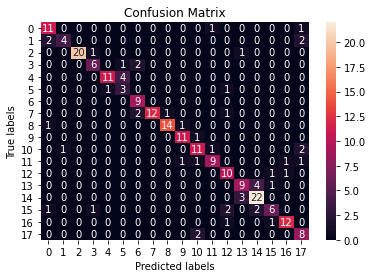

In [158]:
labels = [val for val in ang_dict.values()]
import seaborn as sns   
conf_a = sk.confusion_matrix(t_a,p_a )
ax= plt.subplot()
sns.heatmap(conf_a, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [159]:
def acc_extended(conf_matrix):
    subtract = 0
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            if np.abs(j-i)<2: subtract += conf_matrix[i, j]
    return np.sum(conf_matrix) - subtract

In [160]:
print(f'{100*(len(t_a)-acc_extended(conf_a))/len(t_a):2.0f}% accuracy within 30 degrees')

89% accuracy within 30 degrees


In [161]:
preds = model_d.predict(x_test)
t_d = [argmax(y3) for y3 in d_test]
p_d = [argmax(pr) for pr in preds]
sk.confusion_matrix(t_d,p_d )

array([[ 8,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  4,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  8,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  7,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  7,  

In [162]:
vals = np.unique(np.array(d_binned).astype(int))
keys = np.array(range(len(vals)))
dist_dict =  {val:key for key, val in zip(keys[:-1], vals[:-1])}
dist_dict

{10: 0,
 20: 1,
 30: 2,
 40: 3,
 50: 4,
 60: 5,
 70: 6,
 80: 7,
 90: 8,
 100: 9,
 110: 10,
 120: 11,
 130: 12,
 140: 13,
 150: 14,
 160: 15,
 170: 16,
 180: 17,
 190: 18,
 200: 19,
 210: 20,
 220: 21,
 230: 22,
 240: 23,
 250: 24,
 260: 25,
 270: 26,
 280: 27,
 290: 28}

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (29).

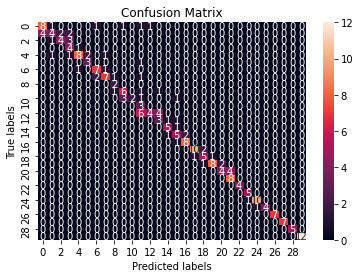

In [163]:
labels = [val for val in dist_dict.values()]
import seaborn as sns   
conf_d = sk.confusion_matrix(t_d,p_d )
ax= plt.subplot()
sns.heatmap(conf_d, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [164]:
print(f'{100*(len(t_a)-acc_extended(conf_d))/len(t_a):2.0f}% accuracy within 15 meters')

94% accuracy within 15 meters


In [44]:
model_a.save('saved_model/model_angle_1.h5')
model_d.save('saved_model/model_distance_1.h5')

In [ ]:
obs, sr = librosa.load('./AudioClips/'+files[2][20])
files[2][20]

In [ ]:
np.argmax(model.predict(np.reshape(obs[1000:16000], [1, 15000, 1])))

In [ ]:
y

In [ ]:
dictvals